In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import astropy.constants as con
# import astropy.units as u
import random

In [ ]:
VARIABLES

In [2]:
e = 1.6021766e-19
eps0 = 8.854187817e-12
#eps0 = con.eps0
# m_alpha = 6.644657e-27 *u.kg
# c_alpha = 2*e

In [ ]:
CLASS DEFINITIONS

In [3]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def locate(self):
      return np.array([self.x,self.y])

    def length(self):
        return np.sqrt((self.x **2) + (self.y **2))
    
    def dot(self, other):
        return (self.x*other.x) + (self.y*other.y)
    
    def angle_between(self, other):
        return np.arccos(self.dot(other) / (self.length()*other.length()) )
                        
    
    def dist_to(self, other):
        return np.sqrt(((other.y - self.y)**2) + ((other.x - self.x)**2))
    def sub(self,other):
      return Vector(self.x-other.x,self.y-other.y)

In [4]:
# Our Test Particle object
class Particle:
  '''
  ~ This Object is the particle that we can place into the system with initial positions and velocities
  pos [Vector object!] - Represents the particle's position in space
  vel [Vector object!] - Represents the particle's velocity 
  acc [Vector object!] - Reprecents the particle's acceleration
  charge [Scalar]- Represents particle charge
  mass [Scalar] - Represents particle mass
  '''
  def __init__(self, pos, vel, acc, charge, mass):
    self.pos = pos
    self.vel = vel
    self.acc = acc
    self.charge = charge
    self.mass=mass

  def move(self, other, dt):
    ''' dt is the time step of the simulation, it dictates the precision of the simulation.    '''

    # x movement
    self.pos.x = self.pos.x + self.vel.x * dt #+ 0.5*self.acc.x*dt
    self.vel.x = self.vel.x + self.acc.x * dt
    
    # y movement
    self.pos.y = self.pos.y + self.vel.y * dt #+ 0.5*self.acc.y*dt
    self.vel.y = self.vel.y + self.acc.y * dt

    # Changing Acceleration
    self.acc.x = ( 1/(4*np.pi* eps0) * (self.charge * other.charge / (self.mass*((self.pos.dist_to(other.pos))**2))) ) * ((self.pos.x-other.pos.x)/(self.pos.sub(other.pos).length())) 
    self.acc.y = ( 1/(4*np.pi* eps0) * (self.charge * other.charge / (self.mass*((self.pos.dist_to(other.pos))**2))) ) * ((self.pos.y-other.pos.y)/(self.pos.sub(other.pos).length()))

In [ ]:
TESTING

[0, 0]


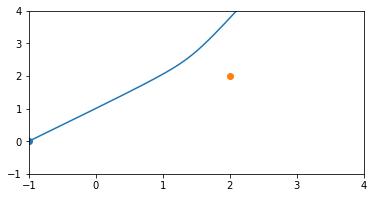

In [9]:
electron1 = Particle(Vector(-1,0), Vector(30,30), Vector(0,0), e,9.11e-31)
electron2 = Particle(Vector(2,2), Vector(0,0), Vector(0,0), e,9.11e-31)
posx=[]
posy=[]

print([electron1.acc.x, electron1.acc.y])

plt.figure(figsize = (6,3))
plt.xlim(-1,4)
plt.ylim(-1,4)

plt.scatter(electron1.pos.x, electron1.pos.y)
plt.scatter(electron2.pos.x, electron2.pos.y)

for t in range (150000):
  electron1.move(electron2, 1e-6)
  posx.append(electron1.pos.x)
  posy.append(electron1.pos.y)

plt.plot(posx,posy)


# for t in range (1000000):
#   electron2.move(electron1, 0.0000001)
#   posx2.append(electron2.pos.x)
#   posy2.append(electron2.pos.y)
# plt.plot(posx2,posy2)

In [50]:
import pandas as pd
X=[]
Y=[]
for i in ([1,1.3,1.45,1.5,1.55,1.7,2]):
  electron1 = Particle(Vector(i,4), Vector(0,-50), Vector(0,0), e,9.11e-31)
  electron2 = Particle(Vector(1.5,1), Vector(0,0), Vector(0,0), e,9.11e-31)
  posx=[]
  posy=[]

  plt.figure(figsize = (6,3))
  plt.xlim(-1,4)
  plt.ylim(-1,4)

  plt.scatter(electron1.pos.x, electron1.pos.y)
  plt.scatter(electron2.pos.x, electron2.pos.y)

  for t in range (15000):
    electron1.move(electron2, 1e-5)
    if t%100==0:
      posx.append(electron1.pos.x)
      posy.append(electron1.pos.y)
  X.append(posx)
  Y.append(posy)
  plt.plot(posx,posy)
df = pd.DataFrame({'X_0.01': X[0],'Y_0.01': Y[0],'X_0.03': X[1],'Y_0.03': Y[1],
                   'X_0.05': X[2],'Y_0.05': Y[2],'X_0.1': X[3],'Y_0.1': Y[3],
                   'X_0.2': X[4],'Y_0.2': Y[4],'X_0.3': X[5],'Y_0.3': Y[5],
                   'X_0.5': X[6],'Y_0.5': Y[6],})
df.to_csv(index=False)
compression_opts = dict(method='zip',archive_name='testing.csv')  
df.to_csv('testing.zip', index=False,compression=compression_opts)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter 
from matplotlib import animation
%config InlineBackend.figure_format='retina' # UNCOMMENT IF USING MAC makes display better %matplotlib osx
%matplotlib osx

In [54]:
file=pd.read_csv("testing.csv")
file
metadata = dict(title='Rutherford Scattering', artist='Matplotlib') 
writer = FFMpegWriter(fps=50, metadata=metadata, bitrate=200000) 
fig = plt.figure(dpi=200)
fig, ax = plt.subplots(figsize=(5,5))


with writer.saving(fig, "Animation.mp4", dpi=200): 
    for i in range(len(file["X_0.01"])):
        ax.clear()
        plt.scatter(file["X_0.01"][i],file["Y_0.01"][i],color="blue")
        ax.plot(file["X_0.01"][:i],file["Y_0.01"][:i],color="blue", alpha=0.5)
        plt.scatter(file["X_0.03"][i],file["Y_0.03"][i],color="red")
        ax.plot(file["X_0.03"][:i],file["Y_0.03"][:i],alpha=0.5,color="red")
        plt.scatter(file["X_0.05"][i],file["Y_0.05"][i],color="orange")
        ax.plot(file["X_0.05"][:i],file["Y_0.05"][:i],alpha=0.5,color="orange")
        plt.scatter(file["X_0.1"][i],file["Y_0.1"][i],color="green")
        ax.plot(file["X_0.1"][:i],file["Y_0.1"][:i],alpha=0.5,color="green")
        plt.scatter(file["X_0.2"][i],file["Y_0.2"][i],color="yellow")
        ax.plot(file["X_0.2"][:i],file["Y_0.2"][:i],alpha=0.5,color="yellow")
        plt.scatter(file["X_0.3"][i],file["Y_0.3"][i],color="gray")
        ax.plot(file["X_0.3"][:i],file["Y_0.3"][:i],alpha=0.5,color="gray")
        plt.scatter(file["X_0.5"][i],file["Y_0.5"][i],color="black")
        ax.plot(file["X_0.5"][:i],file["Y_0.5"][:i],alpha=0.5,color="black")
        plt.scatter(1.5,1)
        plt.xlim(-1,4)
        plt.ylim(-1,4)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Rutherford Scattering of Multiple Electrons")
        plt.draw()
        plt.pause(0.00001)
        writer.grab_frame()

In [ ]:
DATA ANALYSIS

In [60]:
df_projectile = pd.read_csv('testing.csv')      # importing csv file
proj_e_x3 = df_projectile['X_0.05'].values     # importing column data
proj_e_y3 = df_projectile['Y_0.05'].values

In [64]:
proj_e_x3

array([ 1.45      ,  1.44999976,  1.44999903,  1.44999779,  1.44999599,
        1.44999362,  1.44999064,  1.44998702,  1.44998271,  1.44997769,
        1.4499719 ,  1.44996531,  1.44995786,  1.44994949,  1.44994015,
        1.44992977,  1.44991828,  1.44990561,  1.44989168,  1.44987638,
        1.44985963,  1.4498413 ,  1.44982129,  1.44979945,  1.44977563,
        1.44974968,  1.4497214 ,  1.44969059,  1.44965703,  1.44962044,
        1.44958055,  1.44953702,  1.44948947,  1.4494375 ,  1.4493806 ,
        1.44931822,  1.44924972,  1.44917435,  1.44909123,  1.44899936,
        1.44889753,  1.44878432,  1.44865802,  1.4485166 ,  1.44835758,
        1.44817792,  1.44797391,  1.44774089,  1.44747303,  1.4471629 ,
        1.44680092,  1.44637461,  1.44586748,  1.44525736,  1.44451405,
        1.44359575,  1.44244374,  1.44097437,  1.43906747,  1.43655004,
        1.43317591,  1.42860609,  1.42240363,  1.41406587,  1.40311081,
        1.38919659,  1.37220867,  1.35226183,  1.32962967,  1.30

In [134]:
min(proj_e_y3)

1.176680917052053

In [139]:
plt.scatter(range(150), proj_e_y3, s = 2.25, color = 'blue', label = 'Electron Y Coordinate')
plt.axvline(65, color='k', linestyle='--', label = 'Closest Approach @ ~1.3s')
plt.xlabel('Time Steps(0.02 s)')     # x & y labels
plt.ylabel('Y Position')
plt.title('Vertical Position of Orange/Yellow Electrons')
plt.legend()